In [1]:
import pandas as pd
from PCA import pca
pc=pca()

In [2]:
data_set=pd.read_csv("Wine.csv")
data_set

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
#No categorical data in dataset so no need to do get_dummies

In [4]:
#input and output split
Indep_x=data_set.drop("Customer_Segment",axis=1)
Depend_y=data_set["Customer_Segment"]

In [5]:
#Split the train and test data
x_train,x_test,y_train,y_test=pc.split_scaler(Indep_x,Depend_y)

In [6]:
#Give input and output to PCA, 3 no of cloumns accept 
x_train,x_test,explained_variance=pc.PCA_input(x_train,x_test,3)

In [14]:
#The explained_variance_ratio_ tells you how much information (variance) is captured by each component.
#We give input 3 so 3 component will get in linear line, result will tells the % of the component collect the data.
explained_variance

array([0.37329648, 0.18818926, 0.10896791])

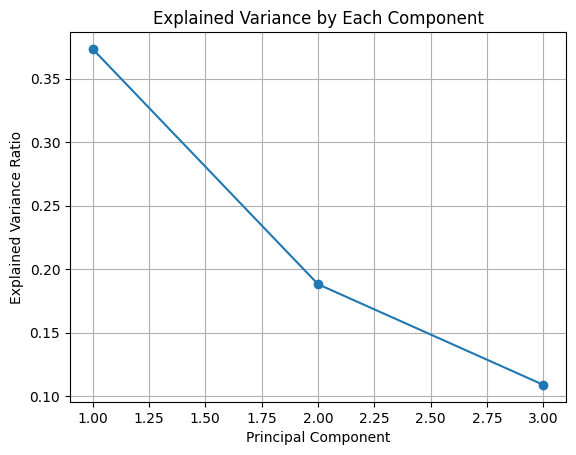

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance)+1), 
         explained_variance, marker='o')
plt.title('Explained Variance by Each Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [9]:
#After the PCA we get the liear pattern data, PCA will extract the linear data, using that data we can perfor the Supervise --- Classification
acclog=[]
accsvml=[]
accknn=[]
accdes=[]
accrf=[]

In [10]:
classifier,Accuracy,report,x_test,y_test,cm=pc.Logistic(x_train,y_train,x_test,y_test)
acclog.append(Accuracy)

classifier,Accuracy,report,x_test,y_test,cm=pc.svm_linear(x_train,y_train,x_test,y_test)  
accsvml.append(Accuracy)

classifier,Accuracy,report,x_test,y_test,cm=pc.knn(x_train,y_train,x_test,y_test)  
accknn.append(Accuracy)

classifier,Accuracy,report,x_test,y_test,cm=pc.Decision(x_train,y_train,x_test,y_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,x_test,y_test,cm=pc.random(x_train,y_train,x_test,y_test)  
accrf.append(Accuracy)

In [12]:
result=pc.PCA_Classification(acclog,accsvml,accknn,accdes,accrf)

In [13]:
result

,Logistic,SVMl,KNN,Decision,Random
PCA,0.981481,1.0,0.981481,0.981481,0.962963


In [ ]:
#SVML had best score 